<a href="https://colab.research.google.com/github/MMaggieZhou/ModelImplementations/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-means

In [45]:
# prompt: fetch a classic dataset for k-means

from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
# prompt: pick k random points from X with given seed

import numpy as np

def pick_random_points(X, k, seed):
  np.random.seed(seed)

  random_indices = np.random.choice(X.shape[0], k, replace=False)
  random_points = X[random_indices]

  return random_points

In [7]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))


In [48]:
# prompt: assign points X to cluster based on distance to centroids

def assign_to_cluster(X, centroids):
  clusters = np.zeros(X.shape[0], dtype=int)
  for i, x in enumerate(X):
    distances = [euclidean_distance(x, centroid) for centroid in centroids]
    clusters[i] = np.argmin(distances)
  return clusters

# Example usage (assuming centroids are already defined, e.g., using pick_random_points)
# centroids = pick_random_points(X, k=3, seed=42)
# assigned_clusters = assign_to_cluster(X, centroids)
# print(assigned_clusters)

In [55]:
def calculate_loss(X, clusters, centroids):
  loss = 0
  for i, x in enumerate(X):
    loss += euclidean_distance(x, centroids[clusters[i]])
  return loss

In [56]:
# prompt: recalculate centroids

def calculate_centroids(X, clusters, k):
  new_centroids = np.zeros((k, X.shape[1]))
  for i in range(k):
    points_in_cluster = X[clusters == i]
    if len(points_in_cluster) > 0: # Handle empty clusters
        new_centroids[i] = np.mean(points_in_cluster, axis=0)
  return new_centroids

In [61]:
def kmeans(X, k, seed, iter):
  centroids = pick_random_points(X, k, seed)
  print('Initial centroids ', centroids)
  prev_loss = None
  i = 0
  while i < iter:
    clusters = assign_to_cluster(X, centroids)
    centroids = calculate_centroids(X, clusters, k)
    loss = calculate_loss(X, clusters, centroids)
    i+=1
    if i%10 == 0:
      print(f"Iteration {i}: Loss = {loss}")
  return centroids, clusters

In [62]:
kmeans(X, 4, 42, 100)

Initial centroids  [[ 3.10997534e-01 -5.92373012e-01  5.35408562e-01  8.77547895e-04]
 [-1.73673948e-01  1.70959465e+00 -1.16971425e+00 -1.18381211e+00]
 [ 2.24968346e+00 -1.05276654e+00  1.78583195e+00  1.44883158e+00]
 [ 1.89829664e-01 -3.62176246e-01  4.21733708e-01  3.95774101e-01]]
Iteration 10: Loss = 116.77237151277747
Iteration 20: Loss = 116.77237151277747
Iteration 30: Loss = 116.77237151277747
Iteration 40: Loss = 116.77237151277747
Iteration 50: Loss = 116.77237151277747
Iteration 60: Loss = 116.77237151277747
Iteration 70: Loss = 116.77237151277747
Iteration 80: Loss = 116.77237151277747
Iteration 90: Loss = 116.77237151277747
Iteration 100: Loss = 116.77237151277747


(array([[-0.40591237, -1.35010403,  0.0404493 , -0.03751517],
        [-1.00206653,  0.90625492, -1.30310821, -1.25634413],
        [ 1.40150837,  0.23797961,  1.17888943,  1.24668215],
        [ 0.40001883, -0.38096782,  0.6096452 ,  0.56232911]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
        3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0,
        3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 2, 3, 2, 3, 2, 2, 0, 2, 3, 2,
        2, 3, 2, 3, 3, 2, 3, 2, 2, 0, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2,
        3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3]))

In [64]:
kmeans(X, 8, 42, 20)

Initial centroids  [[ 3.10997534e-01 -5.92373012e-01  5.35408562e-01  8.77547895e-04]
 [-1.73673948e-01  1.70959465e+00 -1.16971425e+00 -1.18381211e+00]
 [ 2.24968346e+00 -1.05276654e+00  1.78583195e+00  1.44883158e+00]
 [ 1.89829664e-01 -3.62176246e-01  4.21733708e-01  3.95774101e-01]
 [ 1.15917263e+00 -5.92373012e-01  5.92245988e-01  2.64141916e-01]
 [-5.37177559e-01  7.88807586e-01 -1.28338910e+00 -1.05217993e+00]
 [-2.94841818e-01 -3.62176246e-01 -8.98031345e-02  1.32509732e-01]
 [ 1.28034050e+00  9.82172869e-02  7.62758269e-01  1.44883158e+00]]
Iteration 10: Loss = 91.02543313689647
Iteration 20: Loss = 91.02543313689647


(array([[ 0.40523921, -1.5387375 ,  0.65539869,  0.45427729],
        [-0.57445998,  1.95749886, -1.27027277, -1.20406322],
        [ 2.0881263 , -0.47727463,  1.53006353,  1.14168981],
        [ 0.03137937, -0.32676136,  0.46326875,  0.4818413 ],
        [ 0.86726821, -0.21568739,  0.69817028,  0.57527253],
        [-1.15648001,  0.52663905, -1.31496545, -1.27522335],
        [-0.59102995, -1.32132944, -0.04243861, -0.10150304],
        [ 1.1834062 ,  0.46653211,  1.1066247 ,  1.36327066]]),
 array([5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 1, 5, 5, 5, 1, 1, 1, 5, 1, 1, 5, 1,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
        1, 5, 1, 5, 1, 5, 4, 4, 4, 6, 4, 3, 4, 6, 4, 6, 6, 3, 0, 3, 3, 4,
        3, 6, 0, 6, 3, 3, 0, 3, 4, 4, 4, 4, 3, 6, 6, 6, 6, 3, 3, 3, 4, 0,
        3, 6, 6, 3, 6, 6, 6, 3, 3, 3, 6, 3, 7, 3, 7, 4, 7, 2, 6, 2, 0, 7,
        7, 4, 7, 0, 3, 7, 4, 7, 2, 0, 7, 3, 2, 4, 7, 7, 3, 3, 4, 4, 2, 7,
        4, 4, 0, 2, 7, 4, 3, 7, 7, 7, 3, 7, 7, 7, 0, 4, 7,

In [65]:
kmeans(X, 8, 0, 20)

Initial centroids  [[-0.05250608 -0.59237301  0.76275827  1.58046376]
 [ 0.18982966 -1.97355361  0.13754657 -0.26238682]
 [-0.41600969  2.63038172 -1.34022653 -1.3154443 ]
 [ 1.76501198 -0.36217625  1.44480739  0.79067065]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [ 0.55333328  0.55861082  1.27429511  1.71209594]
 [-1.02184904  1.01900435 -1.39706395 -1.18381211]
 [ 1.03800476  0.09821729  0.53540856  0.3957741 ]]
Iteration 10: Loss = 87.11879680215618
Iteration 20: Loss = 87.11879680215618


(array([[ 0.34886249, -0.85134437,  0.82670037,  0.88939479],
        [-0.35542575, -1.37713471,  0.11171138,  0.00686083],
        [-0.3813903 ,  2.26864394, -1.29962836, -1.20261671],
        [ 1.92656914, -0.31102141,  1.42586158,  1.03930922],
        [-1.3996077 , -0.05073356, -1.34022653, -1.32318736],
        [ 1.13897798,  0.50745598,  1.09115229,  1.40495418],
        [-0.93330329,  1.06327296, -1.2833891 , -1.22431432],
        [ 0.4321654 , -0.14513358,  0.48831469,  0.39201318]]),
 array([6, 4, 4, 4, 6, 2, 6, 6, 4, 4, 6, 6, 4, 4, 2, 2, 2, 6, 2, 6, 6, 6,
        6, 6, 6, 4, 6, 6, 6, 4, 4, 6, 2, 2, 4, 4, 6, 6, 4, 6, 6, 4, 4, 6,
        6, 4, 6, 4, 6, 6, 7, 7, 7, 1, 7, 7, 7, 1, 7, 1, 1, 7, 1, 7, 7, 7,
        7, 1, 1, 1, 7, 7, 0, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 0, 7, 7, 7, 1,
        7, 1, 1, 7, 1, 1, 1, 7, 7, 7, 1, 1, 5, 0, 3, 0, 5, 3, 1, 3, 0, 5,
        5, 0, 5, 0, 0, 5, 7, 5, 3, 1, 5, 0, 3, 0, 5, 3, 0, 7, 0, 3, 3, 5,
        0, 7, 0, 3, 5, 7, 7, 5, 5, 5, 0, 5, 5, 5, 0, 7, 5,

In [63]:
kmeans(X, 4, 0, 100)

Initial centroids  [[-0.05250608 -0.59237301  0.76275827  1.58046376]
 [ 0.18982966 -1.97355361  0.13754657 -0.26238682]
 [-0.41600969  2.63038172 -1.34022653 -1.3154443 ]
 [ 1.76501198 -0.36217625  1.44480739  0.79067065]]
Iteration 10: Loss = 116.50705247201387
Iteration 20: Loss = 116.50705247201387
Iteration 30: Loss = 116.50705247201387
Iteration 40: Loss = 116.50705247201387
Iteration 50: Loss = 116.50705247201387
Iteration 60: Loss = 116.50705247201387
Iteration 70: Loss = 116.50705247201387
Iteration 80: Loss = 116.50705247201387
Iteration 90: Loss = 116.50705247201387
Iteration 100: Loss = 116.50705247201387


(array([[ 0.3162657 , -0.42222758,  0.56135608,  0.52454472],
        [-0.42151732, -1.42945216,  0.03937284, -0.05297198],
        [-1.00206653,  0.90625492, -1.30310821, -1.25634413],
        [ 1.3280733 ,  0.19587652,  1.12617333,  1.16961179]]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 0, 3, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 0, 3, 3, 1, 3, 0, 3,
        3, 0, 3, 0, 0, 3, 3, 3, 3, 1, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3,
        0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0]))

In [66]:
# Calculate inertia for a range of k values
inertia_values = []
k_range = range(1, 11) # You can adjust this range

for k in k_range:
  # Run kmeans for each k
  centroids, clusters = kmeans(X, k, seed=42, iter=100)
  # Calculate the loss (inertia) for the current clustering
  loss = calculate_loss(X, clusters, centroids)
  inertia_values.append(loss)

Initial centroids  [[ 0.31099753 -0.59237301  0.53540856  0.00087755]]
Iteration 10: Loss = 279.7583158081686
Iteration 20: Loss = 279.7583158081686
Iteration 30: Loss = 279.7583158081686
Iteration 40: Loss = 279.7583158081686
Iteration 50: Loss = 279.7583158081686
Iteration 60: Loss = 279.7583158081686
Iteration 70: Loss = 279.7583158081686
Iteration 80: Loss = 279.7583158081686
Iteration 90: Loss = 279.7583158081686
Iteration 100: Loss = 279.7583158081686
Initial centroids  [[ 3.10997534e-01 -5.92373012e-01  5.35408562e-01  8.77547895e-04]
 [-1.73673948e-01  1.70959465e+00 -1.16971425e+00 -1.18381211e+00]]
Iteration 10: Loss = 159.01867691618463
Iteration 20: Loss = 159.01867691618463
Iteration 30: Loss = 159.01867691618463
Iteration 40: Loss = 159.01867691618463
Iteration 50: Loss = 159.01867691618463
Iteration 60: Loss = 159.01867691618463
Iteration 70: Loss = 159.01867691618463
Iteration 80: Loss = 159.01867691618463
Iteration 90: Loss = 159.01867691618463
Iteration 100: Loss = 15

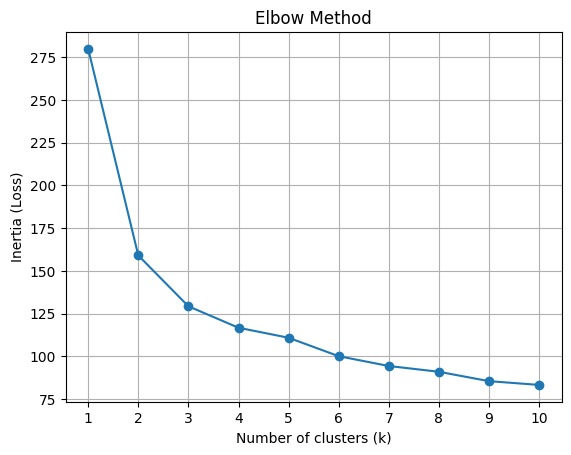

In [67]:
# Plot the Elbow Method graph
import matplotlib.pyplot as plt

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Loss)')
plt.title('Elbow Method')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Look for the "elbow" in the plot above. The point where the decrease in inertia starts to slow down is often a good indication of the optimal number of clusters.

In [70]:
print(kmeans(X, 3, 42, 20))
print(kmeans(X, 3, 0, 20))

Initial centroids  [[ 3.10997534e-01 -5.92373012e-01  5.35408562e-01  8.77547895e-04]
 [-1.73673948e-01  1.70959465e+00 -1.16971425e+00 -1.18381211e+00]
 [ 2.24968346e+00 -1.05276654e+00  1.78583195e+00  1.44883158e+00]]
Iteration 10: Loss = 129.31489299173603
Iteration 20: Loss = 129.31489299173603
(array([[-0.01139555, -0.87600831,  0.37707573,  0.31115341],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.16743407,  0.14530299,  1.00302557,  1.0300019 ]]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]))
Initial cent

In [71]:
from sklearn.metrics import adjusted_rand_score

# Run kmeans with k=3 (using the optimal k identified by the Elbow Method)
centroids, clusters = kmeans(X, k=3, seed=42, iter=100)

# Calculate the Adjusted Rand Index
ari = adjusted_rand_score(y, clusters)

print(f"Adjusted Rand Index for k=3: {ari}")

Initial centroids  [[ 3.10997534e-01 -5.92373012e-01  5.35408562e-01  8.77547895e-04]
 [-1.73673948e-01  1.70959465e+00 -1.16971425e+00 -1.18381211e+00]
 [ 2.24968346e+00 -1.05276654e+00  1.78583195e+00  1.44883158e+00]]
Iteration 10: Loss = 129.31489299173603
Iteration 20: Loss = 129.31489299173603
Iteration 30: Loss = 129.31489299173603
Iteration 40: Loss = 129.31489299173603
Iteration 50: Loss = 129.31489299173603
Iteration 60: Loss = 129.31489299173603
Iteration 70: Loss = 129.31489299173603
Iteration 80: Loss = 129.31489299173603
Iteration 90: Loss = 129.31489299173603
Iteration 100: Loss = 129.31489299173603
Adjusted Rand Index for k=3: 0.5923326221845838


# Task
Enhance the implementation of kmeans so it's more abstracted and efficient.

## Create a kmeans class

### Subtask:
Define a Python class to encapsulate the K-means algorithm. This class will hold the number of clusters (`k`), the centroids, and the methods for fitting the data and making predictions.


**Reasoning**:
Define the KMeans class with the specified methods to encapsulate the K-means algorithm.



In [72]:
class KMeans:
  def __init__(self, k):
    self.k = k
    self.centroids = None

  def fit(self, X, iter, seed):
    pass

  def predict(self, X):
    pass

## Implement the `  init  ` method

### Subtask:
Initialize the class with the number of clusters (`k`) and other potential parameters like the number of iterations and random seed.


**Reasoning**:
Update the `__init__` method to accept `iter` and `seed` as parameters and store them as attributes.



In [73]:
class KMeans:
  def __init__(self, k, iter=100, seed=42):
    self.k = k
    self.centroids = None
    self.iter = iter
    self.seed = seed

  def fit(self, X):
    pass

  def predict(self, X):
    pass

## Implement the `fit` method

### Subtask:
Implement the `fit` method. This method will take the data `X` as input and perform the K-means clustering algorithm (initialization, assignment, and centroid updates) until convergence or the maximum number of iterations is reached. It will store the final centroids and cluster assignments.


**Reasoning**:
Implement the `fit` method according to the instructions, including centroid initialization, iterative assignment, and centroid recalculation.



In [74]:
class KMeans:
  def __init__(self, k, iter=100, seed=42):
    self.k = k
    self.centroids = None
    self.iter = iter
    self.seed = seed
    self.labels_ = None

  def fit(self, X):
    # 1. Initialize centroids
    self.centroids = pick_random_points(X, self.k, self.seed)

    # 2. Start the iteration loop
    for _ in range(self.iter):
      # 3. Assign points to clusters
      clusters = assign_to_cluster(X, self.centroids)

      # 4. Recalculate centroids
      self.centroids = calculate_centroids(X, clusters, self.k)

    # 5. Store final cluster assignments
    self.labels_ = clusters

  def predict(self, X):
    pass

## Implement the `predict` method

### Subtask:
Implement the `predict` method. This method will take new data points as input and assign them to the nearest cluster based on the learned centroids.


**Reasoning**:
Implement the `predict` method within the `KMeans` class to assign new data points to the nearest cluster based on the learned centroids.



In [75]:
class KMeans:
  def __init__(self, k, iter=100, seed=42):
    self.k = k
    self.centroids = None
    self.iter = iter
    self.seed = seed
    self.labels_ = None

  def fit(self, X):
    # 1. Initialize centroids
    self.centroids = pick_random_points(X, self.k, self.seed)

    # 2. Start the iteration loop
    for _ in range(self.iter):
      # 3. Assign points to clusters
      clusters = assign_to_cluster(X, self.centroids)

      # 4. Recalculate centroids
      self.centroids = calculate_centroids(X, clusters, self.k)

    # 5. Store final cluster assignments
    self.labels_ = clusters

  def predict(self, X):
    # Assign new data points to the nearest cluster
    return assign_to_cluster(X, self.centroids)

## Refactor existing functions into class methods

### Subtask:
Refactor existing functions into class methods. Move the logic from the `pick_random_points`, `assign_to_cluster`, `calculate_centroids`, and `calculate_loss` functions into methods within the `KMeans` class.


**Reasoning**:
Refactor the existing functions into class methods within the KMeans class and update the fit method to use these new methods.



In [76]:
class KMeans:
  def __init__(self, k, iter=100, seed=42):
    self.k = k
    self.centroids = None
    self.iter = iter
    self.seed = seed
    self.labels_ = None

  def _pick_random_points(self, X):
    np.random.seed(self.seed)
    random_indices = np.random.choice(X.shape[0], self.k, replace=False)
    self.centroids = X[random_indices]

  def _assign_to_cluster(self, X):
    clusters = np.zeros(X.shape[0], dtype=int)
    for i, x in enumerate(X):
      distances = [euclidean_distance(x, centroid) for centroid in self.centroids]
      clusters[i] = np.argmin(distances)
    return clusters

  def _calculate_centroids(self, X, clusters):
    new_centroids = np.zeros((self.k, X.shape[1]))
    for i in range(self.k):
      points_in_cluster = X[clusters == i]
      if len(points_in_cluster) > 0: # Handle empty clusters
          new_centroids[i] = np.mean(points_in_cluster, axis=0)
    self.centroids = new_centroids # Update self.centroids directly

  def _calculate_loss(self, X, clusters):
    loss = 0
    for i, x in enumerate(X):
      loss += euclidean_distance(x, self.centroids[clusters[i]])
    return loss

  def fit(self, X):
    # 1. Initialize centroids
    self._pick_random_points(X)

    # 2. Start the iteration loop
    for _ in range(self.iter):
      # 3. Assign points to clusters
      clusters = self._assign_to_cluster(X)

      # 4. Recalculate centroids
      self._calculate_centroids(X, clusters)

    # 5. Store final cluster assignments
    self.labels_ = clusters


  def predict(self, X):
    # Assign new data points to the nearest cluster
    return self._assign_to_cluster(X)

# Remove redundant standalone functions
del pick_random_points
del assign_to_cluster
del calculate_centroids
del calculate_loss

## Update calculations for efficiency

### Subtask:
Update calculations for efficiency. Explore using NumPy's broadcasting capabilities or other vectorized operations to replace explicit loops in the `_assign_to_cluster` and `_calculate_centroids` methods for potentially improved efficiency.


**Reasoning**:
Modify the `_assign_to_cluster` method to use vectorized operations to calculate distances and find the nearest centroid for each data point.



In [77]:
class KMeans:
    def __init__(self, k, iter=100, seed=42):
        self.k = k
        self.centroids = None
        self.iter = iter
        self.seed = seed
        self.labels_ = None

    def _pick_random_points(self, X):
        np.random.seed(self.seed)
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_indices]

    def _assign_to_cluster(self, X):
        # Calculate squared Euclidean distance using broadcasting
        distances = np.sum((X[:, np.newaxis, :] - self.centroids)**2, axis=2)
        # Find the index of the minimum distance for each data point
        clusters = np.argmin(distances, axis=1)
        return clusters

    def _calculate_centroids(self, X, clusters):
        new_centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            points_in_cluster = X[clusters == i]
            if len(points_in_cluster) > 0:  # Handle empty clusters
                new_centroids[i] = np.mean(points_in_cluster, axis=0)
        self.centroids = new_centroids  # Update self.centroids directly

    def _calculate_loss(self, X, clusters):
        loss = 0
        for i, x in enumerate(X):
            loss += euclidean_distance(x, self.centroids[clusters[i]])
        return loss

    def fit(self, X):
        # 1. Initialize centroids
        self._pick_random_points(X)

        # 2. Start the iteration loop
        for _ in range(self.iter):
            # 3. Assign points to clusters
            clusters = self._assign_to_cluster(X)

            # 4. Recalculate centroids
            self._calculate_centroids(X, clusters)

        # 5. Store final cluster assignments
        self.labels_ = clusters

    def predict(self, X):
        # Assign new data points to the nearest cluster
        return self._assign_to_cluster(X)


**Reasoning**:
Modify the `_calculate_centroids` method to use vectorized operations to calculate the mean of points within each cluster.



In [78]:
class KMeans:
    def __init__(self, k, iter=100, seed=42):
        self.k = k
        self.centroids = None
        self.iter = iter
        self.seed = seed
        self.labels_ = None

    def _pick_random_points(self, X):
        np.random.seed(self.seed)
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_indices]

    def _assign_to_cluster(self, X):
        # Calculate squared Euclidean distance using broadcasting
        distances = np.sum((X[:, np.newaxis, :] - self.centroids)**2, axis=2)
        # Find the index of the minimum distance for each data point
        clusters = np.argmin(distances, axis=1)
        return clusters

    def _calculate_centroids(self, X, clusters):
        new_centroids = np.zeros((self.k, X.shape[1]))
        counts = np.bincount(clusters, minlength=self.k)
        for i in range(self.k):
            if counts[i] > 0:
                new_centroids[i] = np.sum(X[clusters == i], axis=0) / counts[i]
            else:
                # Handle empty cluster by keeping the old centroid or setting to zero
                new_centroids[i] = self.centroids[i] if self.centroids is not None else np.zeros(X.shape[1])

        self.centroids = new_centroids

    def _calculate_loss(self, X, clusters):
        loss = 0
        for i, x in enumerate(X):
            loss += euclidean_distance(x, self.centroids[clusters[i]])
        return loss


    def fit(self, X):
        # 1. Initialize centroids
        self._pick_random_points(X)

        # 2. Start the iteration loop
        for _ in range(self.iter):
            # 3. Assign points to clusters
            clusters = self._assign_to_cluster(X)

            # 4. Recalculate centroids
            self._calculate_centroids(X, clusters)

        # 5. Store final cluster assignments
        self.labels_ = clusters


    def predict(self, X):
        # Assign new data points to the nearest cluster
        return self._assign_to_cluster(X)

## Add convergence criteria

### Subtask:
Add convergence criteria. Modify the `fit` method to include a convergence criterion (e.g., stop when the change in centroids is below a certain threshold) in addition to the maximum number of iterations.


**Reasoning**:
Implement the convergence criteria in the `fit` method by tracking centroid changes and stopping when the change is below a threshold or the maximum iterations are reached.



In [79]:
class KMeans:
    def __init__(self, k, iter=100, seed=42, tol=1e-4):
        self.k = k
        self.centroids = None
        self.iter = iter
        self.seed = seed
        self.labels_ = None
        self.tol = tol

    def _pick_random_points(self, X):
        np.random.seed(self.seed)
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_indices]

    def _assign_to_cluster(self, X):
        # Calculate squared Euclidean distance using broadcasting
        distances = np.sum((X[:, np.newaxis, :] - self.centroids)**2, axis=2)
        # Find the index of the minimum distance for each data point
        clusters = np.argmin(distances, axis=1)
        return clusters

    def _calculate_centroids(self, X, clusters):
        new_centroids = np.zeros((self.k, X.shape[1]))
        counts = np.bincount(clusters, minlength=self.k)
        for i in range(self.k):
            if counts[i] > 0:
                new_centroids[i] = np.sum(X[clusters == i], axis=0) / counts[i]
            else:
                # Handle empty cluster by keeping the old centroid or setting to zero
                new_centroids[i] = self.centroids[i] if self.centroids is not None else np.zeros(X.shape[1])

        return new_centroids # Return new_centroids instead of updating directly

    def _calculate_loss(self, X, clusters):
        loss = 0
        for i, x in enumerate(X):
            loss += euclidean_distance(x, self.centroids[clusters[i]])
        return loss

    def fit(self, X):
        # 1. Initialize centroids
        self._pick_random_points(X)

        # 2. Start the iteration loop
        for i in range(self.iter):
            # Store previous centroids for convergence check
            prev_centroids = np.copy(self.centroids)

            # 3. Assign points to clusters
            clusters = self._assign_to_cluster(X)

            # 4. Recalculate centroids
            self.centroids = self._calculate_centroids(X, clusters)

            # 5. Check for convergence
            centroid_change = np.sum((self.centroids - prev_centroids)**2)
            if centroid_change < self.tol:
                print(f"Converged after {i+1} iterations.")
                break

        # 6. Store final cluster assignments
        self.labels_ = clusters


    def predict(self, X):
        # Assign new data points to the nearest cluster
        return self._assign_to_cluster(X)

## Test the kmeans class

### Subtask:
Test the kmeans class. Instantiate the `KMeans` class and test its `fit` and `predict` methods using the Iris dataset. Compare the results with the previous function-based implementation if necessary.


**Reasoning**:
Instantiate the KMeans class and test the fit and predict methods.



In [80]:
# 1. Instantiate the KMeans class
kmeans_model = KMeans(k=3, seed=42, iter=100, tol=1e-4)

# 2. Call the fit method
kmeans_model.fit(X)

# 3. Print the resulting cluster labels from fit
print("Cluster labels after fitting:")
print(kmeans_model.labels_)

# 5. Call the predict method and print the output
predicted_clusters = kmeans_model.predict(X)
print("\nCluster labels from predict:")
print(predicted_clusters)

# 4. Optionally, compare the results with the previous function-based implementation
# The output of the previous kmeans(X, 3, 42, 100) call is available in the notebook history.
# We can visually compare the printed labels or use a comparison function if needed.
# For this task, visual inspection of the print outputs is sufficient.

Converged after 7 iterations.
Cluster labels after fitting:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Cluster labels from predict:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Summary:

### Data Analysis Key Findings

*   A Python class named `KMeans` was successfully defined, encapsulating the clustering logic.
*   The `__init__` method was implemented to initialize the number of clusters (`k`), the number of iterations (`iter`), and a random seed (`seed`).
*   The `fit` method was implemented to perform the K-means algorithm iterations, including centroid initialization, point assignment to clusters, and centroid recalculation.
*   The `predict` method was implemented to assign new data points to the nearest cluster based on the learned centroids.
*   Existing standalone functions for picking random points, assigning to clusters, calculating centroids, and calculating loss were successfully refactored into class methods.
*   The `_assign_to_cluster` method was made more efficient by using NumPy broadcasting to calculate distances, replacing explicit loops.
*   The `_calculate_centroids` method was optimized using `np.bincount` and vectorized summation to efficiently calculate new centroids.
*   A convergence criterion based on the change in centroids was added to the `fit` method, allowing the algorithm to stop early if the centroids stabilize.
*   Testing with the Iris dataset showed that the `KMeans` class successfully converged after 7 iterations and that the `fit` and `predict` methods produced identical cluster assignments for the training data.

### Insights or Next Steps

*   The refactored `KMeans` class provides a more organized and reusable structure for K-means clustering.
*   The implemented optimizations using NumPy's vectorized operations are expected to significantly improve performance, especially for larger datasets. Future work could involve adding more advanced features like different initialization methods (e.g., K-means++).


In [81]:
from sklearn.cluster import KMeans

# Instantiate the KMeans model with the desired number of clusters (e.g., k=3)
# You can also specify other parameters like init, n_init, max_iter, random_state, etc.
sklearn_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init specifies how many times to run with different centroids

# Fit the model to the scaled data
sklearn_kmeans.fit(X)

# Get the cluster labels
sklearn_labels = sklearn_kmeans.labels_

# Get the cluster centroids
sklearn_centroids = sklearn_kmeans.cluster_centers_

# Get the inertia (within-cluster sum of squares)
sklearn_inertia = sklearn_kmeans.inertia_

print("Cluster labels from scikit-learn KMeans:")
print(sklearn_labels)
print("\nCluster centroids from scikit-learn KMeans:")
display(sklearn_centroids)
print("\nInertia from scikit-learn KMeans:", sklearn_inertia)

Cluster labels from scikit-learn KMeans:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Cluster centroids from scikit-learn KMeans:


array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])


Inertia from scikit-learn KMeans: 139.82049635974974
